In [1]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('../code')
sys.path.append(PROJECT_DIR)

In [2]:
# Import main classes.
from src.genome.gene import Gene
from src.genome.chromosome import Chromosome
from src.engines.standard_ga import StandardGA

# Import Selection Operators.
from src.operators.selection.tournament_selector import TournamentSelector
from src.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operators.
from src.operators.crossover.uniform_crossover import UniformCrossover
from src.operators.crossover.single_point_crossover import SinglePointCrossover

# Import Mutation Operators.
from src.operators.mutation.swap_mutator import SwapMutator
from src.operators.mutation.random_mutator import RandomMutator

## Rastrigin optimization

In [3]:
# Rastrigin function.
def fun_Rastrigin(_chromosome):
    # Setup the model parameters.
    A, n = 10.0, len(_chromosome)
    
    # Function value.
    f_val = A*n + fsum([xi.datum**2 - A*np.cos(2.0*np.pi*xi.datum) for xi in _chromosome])
    
    # Return the negative (if we want to account for minimization).
    return f_val
# _end_def_

# Random function ~U(-5.12, +5.12).
_func = lambda: np.random.uniform(-5.12, +5.12001)

In [9]:
# Define the number of genes.
M = 5

# Define the number of chromosomes.
N = 100

# Initial population.
population = [Chromosome([Gene(np.random.uniform(-5.0, +5.0), _func) for j in range(M)], np.nan, True)
              for i in range(N)]

# Set the fitness function.
fun_optim = fun_Rastrigin

# Create the StandardGA.
toy_GA = StandardGA(initial_pop=population, fit_func=fun_optim,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(0.1),
                    cross_op=UniformCrossover())

In [10]:
toy_GA.run(epochs=5000, elitism=True, f_tol=1.0e-6, verbose=False)

Initial Avg. Fitness = 90.7616
Final Avg. Fitness = 200.3477
Elapsed time: 64.785 seconds.


In [11]:
toy_GA.best_chromosome().fitness, toy_GA.best_chromosome()._genome

(201.76637988292043,
 [Gene(datum=4.522910013434948, _func=<function <lambda> at 0x11c61b6d0>, valid=True),
  Gene(datum=-4.523401057888986, _func=<function <lambda> at 0x11c61b6d0>, valid=True),
  Gene(datum=-4.523165223408554, _func=<function <lambda> at 0x11c61b6d0>, valid=True),
  Gene(datum=4.523031900690735, _func=<function <lambda> at 0x11c61b6d0>, valid=True),
  Gene(datum=-4.522591258052738, _func=<function <lambda> at 0x11c61b6d0>, valid=True)])

In [12]:
toy_GA.print_operator_stats()

 UniformCrossover: (4771193984)
 _probability: 0.9
 _rng: Generator(PCG64)
 _counter: 250000

 LinearRankSelector: (4760818992)
 _probability: 1.0
 _rng: Generator(PCG64)
 _counter: 5000

 RandomMutator: (4772184208)
 _probability: 0.1
 _rng: Generator(PCG64)
 _counter: 50158



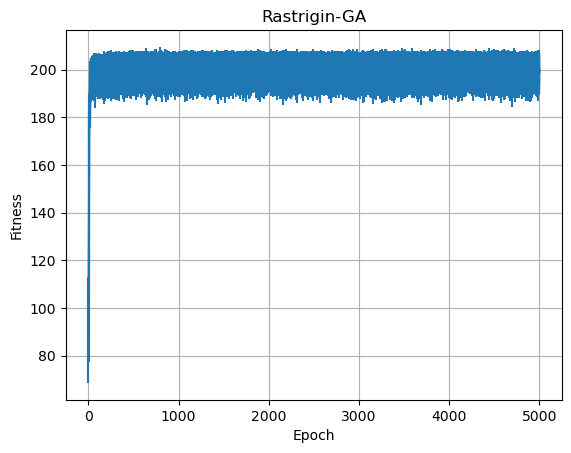

In [13]:
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'])

plt.grid(True)
plt.title("Rastrigin-GA")
plt.xlabel("Epoch")
plt.ylabel("Fitness");